# Analyzing Prompt Gamma Rays

In [1]:
### initializations and import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
%pylab inline

from CGMFtk import histories as fh

Populating the interactive namespace from numpy and matplotlib


In [2]:
### rcParams are the default parameters for matplotlib
import matplotlib as mpl

print ("Matplotbib Version: ", mpl.__version__)

mpl.rcParams['font.size'] = 18
mpl.rcParams['font.family'] = 'Helvetica', 'serif'
#mpl.rcParams['font.color'] = 'darkred'
mpl.rcParams['font.weight'] = 'normal'

mpl.rcParams['axes.labelsize'] = 18.
mpl.rcParams['xtick.labelsize'] = 18.
mpl.rcParams['ytick.labelsize'] = 18.
mpl.rcParams['lines.linewidth'] = 2.

font = {'family' : 'serif',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 18,
        }

mpl.rcParams['xtick.major.pad']='10'
mpl.rcParams['ytick.major.pad']='10'

mpl.rcParams['image.cmap'] = 'inferno'

Matplotbib Version:  3.1.3


First, we load the history file

In [3]:
hist = fh.Histories('98252sf.cgmf')

98252sf.cgmf


Prompt gamma rays can be studied similarly to neutrons, although additional routines can be used to study gamma emissions between discrete states in specific fission fragments.  Many of the routines in **CGMFtk** will look very similar to those used to construct neutron properties.

In [4]:
# the average gamma multiplicity
print ('nubarg (per fission event) = ',hist.nubargtot())
print ('average number of gammas per fragment = ',hist.nubarg())

nubarg (per fission event) =  8.32369
average number of gammas per fragment =  4.161845


We can list the multiplicity of each event

In [6]:
nug = hist.getNugtot()
print (nug[:10])

# hist.getNug() pulls the multiplicity for each fission fragment

[11  6  7  4  5 12 13 10 12  9]


Energies are only available in the lab frame - they are only doppler corrected from the center of mass

As with the neutrons, this function provides a list of energies for each fragment, not each event

In [8]:
Elab = hist.getGammaElab()

# to manipulate the list to provide a list of energies for each event
ElabEvent = Elab[::2] + Elab[1::2]

In addition, there are routines to calculate the average gamma energies as well

In [9]:
# average neutron energies
print ('Gamma energies in the lab:')
print ('Average energy of all gammas = ',hist.meanGammaElab())
print ('Average energy of gammas from light fragment = ',hist.meanGammaElabLF())
print ('Average energy of gammas from heavy fragment = ',hist.meanGammaElabHF())

Gamma energies in the lab:
Average energy of all gammas =  0.75293912339359
Average energy of gammas from light fragment =  0.7589534545393586
Average energy of gammas from heavy fragment =  0.7465280697469625


Finally, we also include a routine to perform gamma spectroscopy, using the discrete levels from RIPL.  It is important to note that **CGMF** does not predict the discrete levels or branching ratios.  Instead, **CGMF** computes the neutron and $\gamma$ emission prior to feeding the discrete states.

To run the `gammaSpec` function, the $\gamma$ ray energy (in MeV) needs to be given, and the width of the energy bin around the given $\gamma$ ray.  Including `post=True` means that the masses and charges of the fragments after neutron emission will be returned.

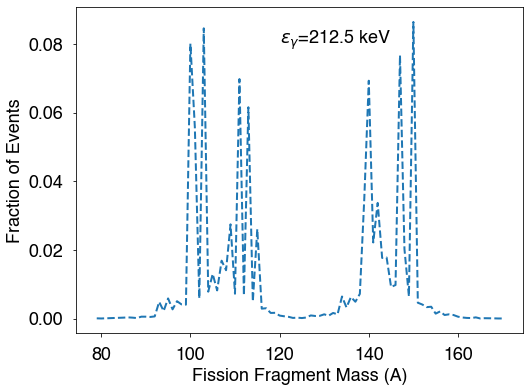

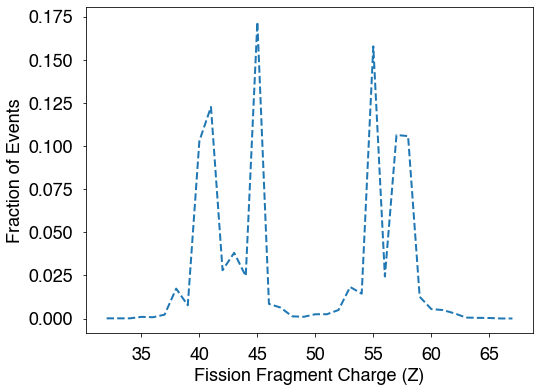

In [12]:
# perform gamma-ray spectroscopy
gE = 0.2125 # gamma ray at 212.5 keV
dE = 0.01 # 1% energy resolution
gspec1 = hist.gammaSpec(gE,dE*gE,post=True)

# calculate the percentage of events for each A/Z
As1 = np.unique(gspec1[:,1])
totEvents = len(gspec1)
fracA1 = []
for A in As1:
    mask = gspec1[:,1]==A
    fracA1.append(len(gspec1[mask])/totEvents)
Zs1 = np.unique(gspec1[:,0])
fracZ1 = []
for Z in Zs1:
    mask = gspec1[:,0]==Z
    fracZ1.append(len(gspec1[mask])/totEvents)

fig = plt.figure(figsize=(8,6))
plt.plot(As1,fracA1,'--')
plt.xlabel('Fission Fragment Mass (A)')
plt.ylabel('Fraction of Events')
plt.text(120,0.08,r'$\epsilon_\gamma$=212.5 keV',fontsize=18)
plt.show()

fig = plt.figure(figsize=(8,6))
plt.plot(Zs1,fracZ1,'--')
plt.xlabel('Fission Fragment Charge (Z)')
plt.ylabel('Fraction of Events')
plt.show()